In [1]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 1.6 MB 49.4 MB/s 
     |████████████████████████████████| 5.8 MB 44.1 MB/s 
     |████████████████████████████████| 438 kB 73.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
## Feature Engineering
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [11]:
## Concatenate Variables with dataframes
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation functions
from tensorflow.keras.layers import Dropout #Regularization Parameters


In [15]:
#ANN initialisation

classifier=Sequential()

In [18]:
## Input Layer

classifier.add(Dense(units=11,activation='relu'))

In [19]:
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.2))

In [20]:
classifier.add(Dense(units=6,activation='relu'))

In [21]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [26]:
#classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
##Early stopping Keras
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8718 - val_loss: 0.3981 - val_accuracy: 0.8425
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.8714 - val_loss: 0.3937 - val_accuracy: 0.8459
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3157 - accuracy: 0.8711 - val_loss: 0.3925 - val_accuracy: 0.8440
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.8716 - val_loss: 0.4040 - val_accuracy: 0.8402
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8711 - val_loss: 0.3892 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8737 - val_loss: 0.3807 - val_accuracy: 0.8417
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8720 - val_loss: 0.3816 - val_accuracy:

In [32]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


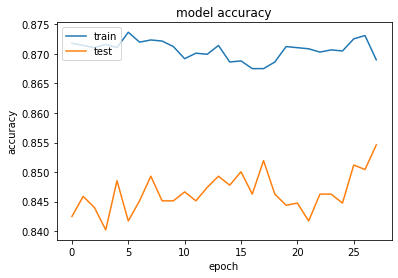

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

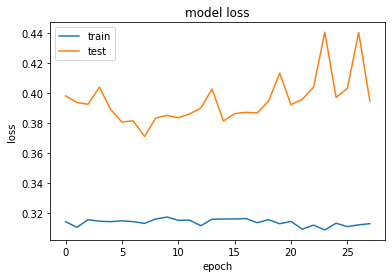

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1489,  106],
       [ 196,  209]])

In [37]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)



In [38]:
score

0.849

In [39]:
## get the weights
classifier.get_weights()

[array([[-0.88689965, -0.47517714,  0.5091171 ,  2.3800669 ,  1.054766  ,
         -0.6747217 , -0.37563494, -0.16299427, -1.6238786 ,  0.48183143,
         -0.3189174 ],
        [ 2.6072135 ,  3.5162437 , -2.1007469 , -5.4052234 , -5.856008  ,
          3.9622428 , -0.5797389 , -0.04832329, -3.9920657 , -2.9085839 ,
          4.2029467 ],
        [-1.8716228 ,  0.2024763 ,  0.80295503,  1.9524989 , -0.41787443,
         -0.23243117,  1.3507266 ,  2.187157  , -0.5466609 , -0.40283564,
         -1.1492194 ],
        [ 3.4724753 ,  0.52051955, -1.8739072 , -2.2057161 ,  1.0740428 ,
         -2.6616333 , -2.938555  ,  0.3496364 ,  2.2639253 , -2.5650153 ,
         -2.3612666 ],
        [ 4.109064  ,  5.700603  ,  6.129384  , -1.9234512 , -0.03033181,
         -4.4536242 ,  1.4497498 , -1.8524914 , -0.68092465, -0.5142986 ,
         -0.9329701 ],
        [-0.4290702 , -0.7768338 ,  0.32619882,  1.4522556 , -1.2877005 ,
         -1.1640222 , -2.6006286 ,  0.22063978, -1.1531467 , -0.4480772